In [9]:
import numpy as np
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt

In [16]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [17]:
BASE_PATH = "/kaggle/input/camvid/CamVid/"

In [18]:
print("NO. test imgs ", len(glob(BASE_PATH+"test/*")))
print("NO. test labels ", len(glob(BASE_PATH+"test_labels/*")))
print("NO. train imgs ", len(glob(BASE_PATH+"train/*")))
print("NO. train labels ", len(glob(BASE_PATH+"train_labels/*")))
print("NO. val imgs ", len(glob(BASE_PATH+"val/*")))
print("NO. val labels ", len(glob(BASE_PATH+"val_labels/*")))

NO. test imgs  232
NO. test labels  232
NO. train imgs  369
NO. train labels  369
NO. val imgs  100
NO. val labels  100


In [19]:
classes = pd.read_csv(BASE_PATH+"class_dict.csv")
n_classes = len(classes)

In [20]:
classes

,name,r,g,b
0,Animal,64,128,64
1,Archway,192,0,128
2,Bicyclist,0,128,192
3,Bridge,0,128,64
4,Building,128,0,0
5,Car,64,0,128
6,CartLuggagePram,64,0,192
7,Child,192,128,64
8,Column_Pole,192,192,128
9,Fence,64,64,128


In [21]:
classes.iloc[0][0]

'Animal'

In [22]:
classes_dict = {classes.loc[cl][0]:list(classes.loc[cl][1:]) for cl in classes.index}
classes_dict

{'Animal': [64, 128, 64],
 'Archway': [192, 0, 128],
 'Bicyclist': [0, 128, 192],
 'Bridge': [0, 128, 64],
 'Building': [128, 0, 0],
 'Car': [64, 0, 128],
 'CartLuggagePram': [64, 0, 192],
 'Child': [192, 128, 64],
 'Column_Pole': [192, 192, 128],
 'Fence': [64, 64, 128],
 'LaneMkgsDriv': [128, 0, 192],
 'LaneMkgsNonDriv': [192, 0, 64],
 'Misc_Text': [128, 128, 64],
 'MotorcycleScooter': [192, 0, 192],
 'OtherMoving': [128, 64, 64],
 'ParkingBlock': [64, 192, 128],
 'Pedestrian': [64, 64, 0],
 'Road': [128, 64, 128],
 'RoadShoulder': [128, 128, 192],
 'Sidewalk': [0, 0, 192],
 'SignSymbol': [192, 128, 128],
 'Sky': [128, 128, 128],
 'SUVPickupTruck': [64, 128, 192],
 'TrafficCone': [0, 0, 64],
 'TrafficLight': [0, 64, 64],
 'Train': [192, 64, 128],
 'Tree': [128, 128, 0],
 'Truck_Bus': [192, 128, 192],
 'Tunnel': [64, 0, 64],
 'VegetationMisc': [192, 192, 0],
 'Void': [0, 0, 0],
 'Wall': [64, 192, 0]}

In [23]:
def show_img(img , mask=False):
    fig ,ax = plt.subplots(figsize=(6,6))
    if not mask:
        img = plt.imread(BASE_PATH+img)
    ax.imshow(img)
    plt.show()
    return img

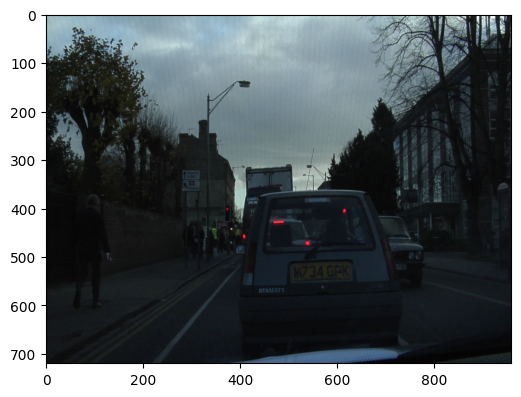

array([[[0.6       , 0.7019608 , 0.7294118 ],
        [0.6       , 0.7019608 , 0.7294118 ],
        [0.58431375, 0.6901961 , 0.7254902 ],
        ...,
        [0.10588235, 0.12156863, 0.10980392],
        [0.10196079, 0.10588235, 0.09803922],
        [0.09411765, 0.09803922, 0.09019608]],

       [[0.58431375, 0.6862745 , 0.7137255 ],
        [0.6       , 0.7019608 , 0.7294118 ],
        [0.5921569 , 0.69803923, 0.73333335],
        ...,
        [0.10588235, 0.12156863, 0.10980392],
        [0.10196079, 0.10588235, 0.10588235],
        [0.09411765, 0.09803922, 0.09803922]],

       [[0.60784316, 0.70980394, 0.7372549 ],
        [0.6156863 , 0.7176471 , 0.74509805],
        [0.60784316, 0.7176471 , 0.7411765 ],
        ...,
        [0.10588235, 0.12156863, 0.11764706],
        [0.10196079, 0.10588235, 0.10588235],
        [0.09411765, 0.09803922, 0.09803922]],

       ...,

       [[0.06666667, 0.06666667, 0.07450981],
        [0.05882353, 0.05882353, 0.06666667],
        [0.05098039, 0

In [24]:
show_img("train/0001TP_009210.png")

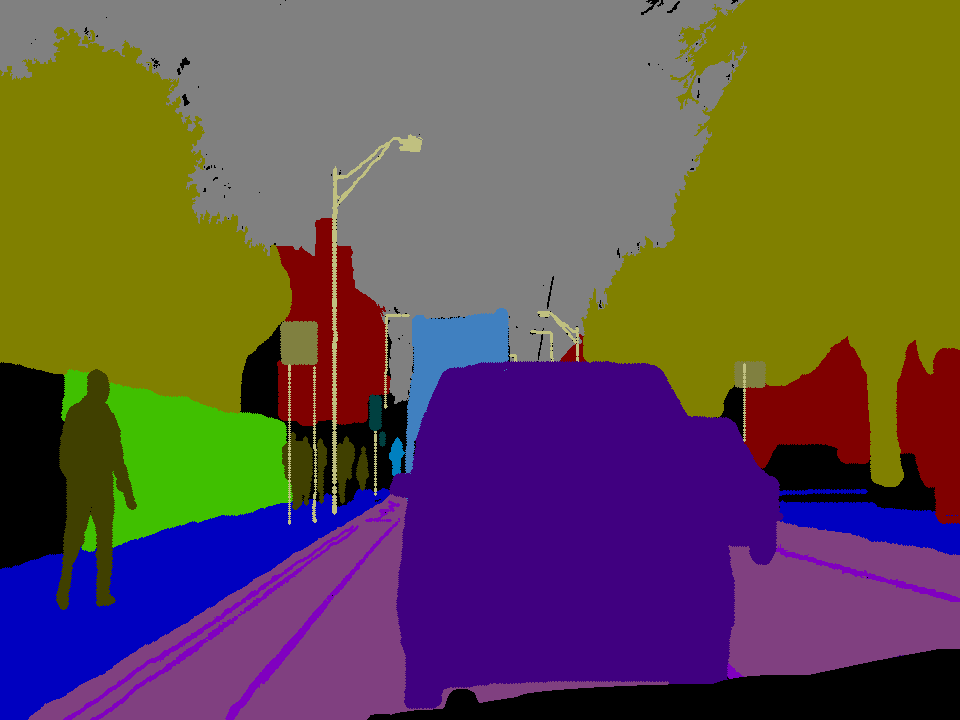

In [25]:
from tensorflow.keras.preprocessing.image import load_img
img = load_img(BASE_PATH + '/train_labels/0001TP_009210_L.png')
img
#img = show_img("train_labels/0001TP_009210_L.png")

In [26]:
img = np.array(img)
print(img.shape)

print(len(classes_dict.values()))

(720, 960, 3)
32


In [27]:
classes_dict.values()

dict_values([[64, 128, 64], [192, 0, 128], [0, 128, 192], [0, 128, 64], [128, 0, 0], [64, 0, 128], [64, 0, 192], [192, 128, 64], [192, 192, 128], [64, 64, 128], [128, 0, 192], [192, 0, 64], [128, 128, 64], [192, 0, 192], [128, 64, 64], [64, 192, 128], [64, 64, 0], [128, 64, 128], [128, 128, 192], [0, 0, 192], [192, 128, 128], [128, 128, 128], [64, 128, 192], [0, 0, 64], [0, 64, 64], [192, 64, 128], [128, 128, 0], [192, 128, 192], [64, 0, 64], [192, 192, 0], [0, 0, 0], [64, 192, 0]])

In [28]:
c_st =  []
for colour in list(classes_dict.values()):   
    c_st.append(colour)

In [29]:
c_st[6]

[64, 0, 192]

In [30]:
print(np.equal(c_st[6], c_st[6]))        
print(np.equal(c_st[6], c_st[8]))        
print(np.equal(c_st[6], c_st[1]))   
print('--------------------------------'  )   
print(c_st[6], c_st[8], c_st[1]   )    

[ True  True  True]
[False False False]
[False  True False]
--------------------------------
[64, 0, 192] [192, 192, 128] [192, 0, 128]


In [31]:
# i was getting this error because of string inside the dict.values() array
# np.equal(['a', 1,1,1], ['a', 1,2,1])
# UFuncTypeError: ufunc 'equal' did not contain a loop with signature matching types (<class 'numpy.dtype[str_]'>, <class 'numpy.dtype[str_]'>) -> None

name of the class: Sky


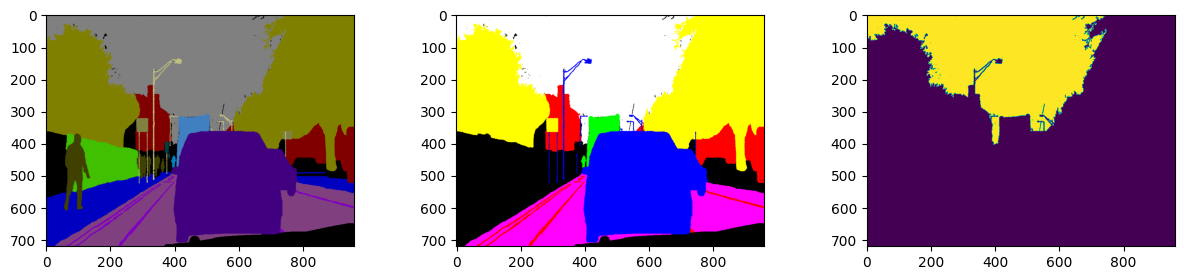

In [32]:
class_name = list( (classes_dict.keys())) 
class_id = 21

case_all_class = np.float32(np.equal(c_st[class_id ], img)*1)
case_true_class =  np.float32(np.all(np.equal(c_st[class_id ], img), axis = -1)*1)


figsize=(15, 3)
_, axes = plt.subplots(nrows=1, ncols= 3, figsize=figsize)

axes[0].imshow(img)
axes[1].imshow(case_all_class )
axes[2].imshow(case_true_class, cmap='gray')

print('name of the class:', class_name[class_id ]   )

plt.imshow(case_all_class)
plt.imshow(case_true_class)

name of the class: Sky


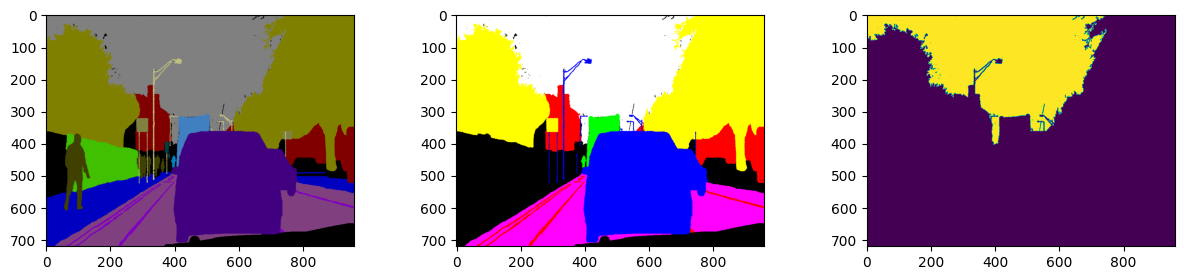

In [33]:
class_name = list( (classes_dict.keys())) 
class_id = 21

case_all_class = np.float32(np.equal(c_st[class_id ], img)*1)
case_true_class =  np.float32(np.all(np.equal(c_st[class_id ], img), axis = -1)*1)


figsize=(15, 3)
_, axes = plt.subplots(nrows=1, ncols= 3, figsize=figsize)

axes[0].imshow(img)
axes[1].imshow(case_all_class )
axes[2].imshow(case_true_class, cmap='gray')

print('name of the class:', class_name[class_id ]   )

plt.imshow(case_all_class)
plt.imshow(case_true_class)

In [34]:
def adjust_mask(mask, flat=False):
    
    semantic_map = []
    for colour in list(classes_dict.values()):        
        equality = np.equal(mask, colour)# 256x256x3 with True or False
        class_map = np.all(equality, axis = -1)# 256x256 If all True, then True, else False
        semantic_map.append(class_map)# List of 256x256 arrays, map of True for a given found color at the pixel, and False otherwise.
    semantic_map = np.stack(semantic_map, axis=-1)# 256x256x32 True only at the found color, and all False otherwise.
    if flat:
        semantic_map = np.reshape(semantic_map, (-1,256*256))

    return np.float32(semantic_map)# convert to numbers

In [35]:
new_mask = adjust_mask(img)
print(new_mask.shape,img.shape)

(720, 960, 32) (720, 960, 3)


In [36]:
idx2rgb={idx:np.array(rgb) for idx, (cl, rgb) in enumerate(classes_dict.items())}

In [37]:
idx2rgb

{0: array([ 64, 128,  64]),
 1: array([192,   0, 128]),
 2: array([  0, 128, 192]),
 3: array([  0, 128,  64]),
 4: array([128,   0,   0]),
 5: array([ 64,   0, 128]),
 6: array([ 64,   0, 192]),
 7: array([192, 128,  64]),
 8: array([192, 192, 128]),
 9: array([ 64,  64, 128]),
 10: array([128,   0, 192]),
 11: array([192,   0,  64]),
 12: array([128, 128,  64]),
 13: array([192,   0, 192]),
 14: array([128,  64,  64]),
 15: array([ 64, 192, 128]),
 16: array([64, 64,  0]),
 17: array([128,  64, 128]),
 18: array([128, 128, 192]),
 19: array([  0,   0, 192]),
 20: array([192, 128, 128]),
 21: array([128, 128, 128]),
 22: array([ 64, 128, 192]),
 23: array([ 0,  0, 64]),
 24: array([ 0, 64, 64]),
 25: array([192,  64, 128]),
 26: array([128, 128,   0]),
 27: array([192, 128, 192]),
 28: array([64,  0, 64]),
 29: array([192, 192,   0]),
 30: array([0, 0, 0]),
 31: array([ 64, 192,   0])}

In [38]:
def map_class_to_rgb(p):
    return idx2rgb[p[0]]

In [39]:
# The purpose is, when you get the (nxmxclass_dim) shaped segmentation map, you need to convert it
# into an image (nxmx3). Below you do that for new_mask array/map from previous block.

rgb_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(np.argmax(new_mask, axis=-1), -1))

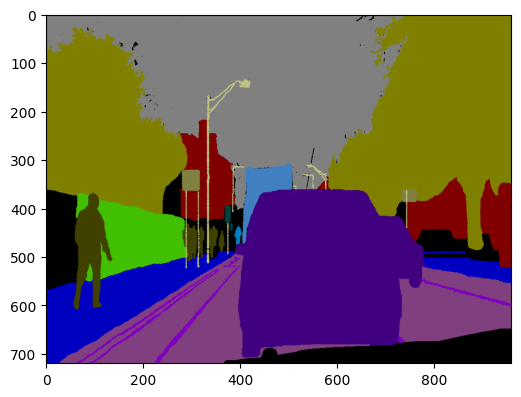

array([[[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128,   0],
        [128, 128,   0],
        [128, 128,   0]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128,   0],
        [128, 128,   0],
        [128, 128,   0]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128,   0],
        [128, 128,   0],
        [128, 128,   0]],

       ...,

       [[  0,   0, 192],
        [  0,   0, 192],
        [  0,   0, 192],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0, 192],
        [  0,   0, 192],
        [  0,   0, 192],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0, 192],
        [  0,   0, 192],
        [  0,   0, 192],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [40]:
show_img(rgb_mask,mask=True)

In [41]:
import numpy as np 
import os
import tensorflow as tf
#import skimage.io as io
#import skimage.transform as trans
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K
# from tensorflow.keras.utils import *
from tensorflow.keras.regularizers import * 

In [42]:
 # Clear all previously registered custom objects
keras.saving.get_custom_objects().clear()


@keras.saving.register_keras_serializable(package="my_package", name="dice")
def dice(y_true, y_pred, smooth=1):
    
    intersection = K.sum(y_true * y_pred, axis=[-1])
    union = K.sum(y_true, axis=[-1]) + K.sum(y_pred, axis=[-1])
    dicef = K.mean((2. * intersection + smooth)/(union + smooth), axis=-1)
    return dicef


@keras.saving.register_keras_serializable(package="my_package", name="IOU")
def IOU(y_true, y_pred, smooth=1):

    intersection = K.sum(y_true * y_pred, axis=[-1])
    union = K.sum(y_true, axis=[-1]) + K.sum(y_pred, axis=[-1])-intersection
    iou_scr = K.mean(( intersection + smooth)/(union + smooth), axis=-1)
    return iou_scr

from keras.optimizers import Adam

In [43]:
def unet(n_classes, pretrained_weights = None,input_size = (256,256,3), flat=False, ohe=True):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    #conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    #conv10 = Conv2D(n_classes, (1,1), activation = 'softmax')(conv9)
    conv10 = Conv2D(n_classes, (1,1), padding='same')(conv9)
    if flat:
      output_layer = Reshape((256*256,n_classes))(conv10)
    else:
      output_layer = conv10
    output_layer = Activation('softmax')(output_layer)
     

    model = Model(inputs = inputs, outputs = output_layer)
    
    Adam =  tf.keras.optimizers.Adam
    if ohe:
      model.compile(optimizer = Adam(lr = 1e-4), loss = 'categorical_crossentropy', metrics = ['accuracy',dice, IOU])
    else:
      model.compile(optimizer = Adam(lr = 1e-4), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy',dicec])
    
    #model.summary()

    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model

In [44]:
model = unet(n_classes)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [47]:
def custom_seg_model2(n_classes, pretrained_weights = None,input_size = (256,256,3), flat=False, ohe=True):
    inputs = Input(input_size)
    conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv2 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv3 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)

    pool4 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    
    pool5 = MaxPooling2D(pool_size=(2, 2))(conv4)
#     conv5 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool5)
#     conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    
#     pool6 = MaxPooling2D(pool_size=(2, 2))(conv5)
    
    up6 = UpSampling2D(size = (2,2))(pool5)
    sum65 = Concatenate()([up6, pool4])
    
    up7 = UpSampling2D(size = (2,2))(sum65)
    sum74 = Concatenate()([up7, pool3])
    
    up8 = UpSampling2D(size = (4,4))(sum74)
    conv8 = Conv2D(n_classes, 3, activation='softmax', padding='same', kernel_initializer = 'he_normal')(up8)
    
    output_layer = conv8
    
    
    
#     conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool6)
#     conv6 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)
    
#     conv7 = Conv2D(n_classes, 3, activation = 'sigmoid', padding = 'same', kernel_initializer = 'he_normal')(conv6)

#     deconv8 = Conv2DTranspose(n_classes, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
#     conv8 = Conv2D(n_classes, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(deconv8)
#     bn8 = BatchNormalization()(conv8)

    
#     skipool51 = MaxPooling2D(pool_size=(2, 2))(conv4)
#     skiconv51 = Conv2D(n_classes, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(skipool51)
#     sum51 = Concatenate()([skiconv51,bn8])
    
#     deconv9 = Conv2DTranspose(n_classes, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(sum51))
#     conv9 = Conv2D(n_classes, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(deconv9)
#     bn9 = BatchNormalization()(conv9)
    
#     skipool41 = MaxPooling2D(pool_size=(2, 2))(conv3)
#     skiconv41 = Conv2D(n_classes, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(skipool41)
#     sum41 = Concatenate()([skiconv41,bn9])
    
#     deconv10 = Conv2DTranspose(n_classes, 3, activation = 'softmax', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (8,8))(sum41))
    
#     output_layer = deconv10
    
    
#     deconv9 = Conv2D(n_classes, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(bn8))
#     bn9 = BatchNormalization()(deconv9)
    
#     deconv10 = Conv2D(n_classes, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(bn9))
#     bn10 = BatchNormalization()(deconv10)
    
#     deconv11 = Conv2D(n_classes, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(bn10))
#     bn11 = BatchNormalization()(deconv11)
    
#     deconv12 = Conv2D(n_classes, 3, activation = 'softmax', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(bn11))
    
#     output_layer = deconv12
    
#     if flat:
#       output_layer = Reshape((256*256,n_classes))(conv10)
#     else:
#       output_layer = conv10
#     output_layer = Activation('softmax')(output_layer)
     

    model = Model(inputs = inputs, outputs = output_layer)
    Adam =  tf.keras.optimizers.Adam
    if ohe:
      model.compile(optimizer = Adam(lr = 1e-4), loss = 'categorical_crossentropy', metrics = ['accuracy',dice, IOU])
    else:
      model.compile(optimizer = Adam(lr = 1e-4), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy',dicec])
    
    #model.summary()

    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model

In [48]:
model = custom_seg_model2(n_classes)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_43 (Conv2D)             (None, 256, 256, 32  896         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_44 (Conv2D)             (None, 256, 256, 32  9248        ['conv2d_43[0][0]']              
                                )                                                           

In [49]:
def conv_block(y, ks, filters, stage, block, strides):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    f1, f2, f3 = filters
    
    y_short = y
    
    y = Conv2D(f1, (1,1), strides=(strides, strides), padding='valid', name = conv_name_base+'2a', kernel_initializer='glorot_uniform')(y)
    y = BatchNormalization(axis=3, name=bn_name_base+'2a')(y)
    y = Activation('relu')(y)
    
    y = Conv2D(f2, (ks,ks), strides=(1, 1), padding='same', name = conv_name_base+'2b', kernel_initializer='glorot_uniform')(y)
    y = BatchNormalization(axis=3, name=bn_name_base+'2b')(y)
    y = Activation('relu')(y)
    
    y = Conv2D(f3, (1,1), strides=(1, 1), padding='valid', name = conv_name_base+'2c', kernel_initializer='glorot_uniform')(y)
    y = BatchNormalization(axis=3, name=bn_name_base+'2c')(y)
    
    y_short = Conv2D(f3, (1,1), strides=(strides, strides), padding='valid', name = conv_name_base+'1', kernel_initializer='glorot_uniform')(y_short)
    y_short = BatchNormalization(axis=3, name=bn_name_base+'1')(y_short)
    
    y = Add()([y, y_short])
    y = Activation('relu')(y)
    
    return y
    
    
def identity_block(y, ks, filters, stage, block, strides = 1):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    f1, f2, f3 = filters
    
    y_short = y
    
    y = Conv2D(f1, (1,1), strides=(strides, strides), padding='valid', name = conv_name_base+'2a', kernel_initializer='glorot_uniform')(y)
    y = BatchNormalization(axis=3, name=bn_name_base+'2a')(y)
    y = Activation('relu')(y)
    
    y = Conv2D(f2, (ks,ks), strides=(strides, strides), padding='same', name = conv_name_base+'2b', kernel_initializer='glorot_uniform')(y)
    y = BatchNormalization(axis=3, name=bn_name_base+'2b')(y)
    y = Activation('relu')(y)
    
    y = Conv2D(f3, (1,1), strides=(strides, strides), padding='valid', name = conv_name_base+'2c', kernel_initializer='glorot_uniform')(y)
    y = BatchNormalization(axis=3, name=bn_name_base+'2c')(y)
    
    y = Add()([y, y_short]) # skip connection
    y = Activation('relu')(y)
    
    return y

In [51]:
model = custom_seg_model3(n_classes)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_52 (Conv2D)             (None, 256, 256, 32  896         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_53 (Conv2D)             (None, 256, 256, 32  9248        ['conv2d_52[0][0]']              
                                )                                                           

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [53]:
#config 
view = 0
batch_sz = 8
epochs = 10
 
validation_steps = 32

In [54]:
data_gen_args = dict(rescale=1./255)

# So our usage here is as data loader instead of loading everything in RAM, not data augmentation
mask_gen_args = dict()

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen  = ImageDataGenerator(**mask_gen_args) 
# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1
#image_datagen.fit(images, augment=True, seed=seed)
#mask_datagen.fit(masks, augment=True, seed=seed)

image_generator = image_datagen.flow_from_directory(
    BASE_PATH,
    class_mode=None,
    classes=['train'],
    seed=seed,
    batch_size=batch_sz,
    target_size=(256,256))
mask_generator = mask_datagen.flow_from_directory(
    BASE_PATH,
    classes=['train_labels'],
    class_mode=None,
    seed=seed,
    color_mode='rgb',
    batch_size=batch_sz,
    target_size=(256,256))

# combine generators into one which yields image and masks
train_generator = zip(image_generator, mask_generator)

val_image_generator = image_datagen.flow_from_directory(
    BASE_PATH,
    class_mode=None,
    classes=['val'],
    seed=seed,
    batch_size=batch_sz,
    target_size=(256,256))

val_mask_generator = mask_datagen.flow_from_directory(
    BASE_PATH,
    classes=['val_labels'],
    class_mode=None,
    seed=seed,
    batch_size=batch_sz,
    color_mode='rgb',
    target_size=(256,256))
val_generator = zip(val_image_generator, val_mask_generator)


Found 369 images belonging to 1 classes.
Found 369 images belonging to 1 classes.
Found 100 images belonging to 1 classes.
Found 100 images belonging to 1 classes.


In [55]:
def train_generator_fn():
    for (img,mask) in train_generator:
    
        
        new_mask = adjust_mask(mask)
        yield (img,new_mask)    

In [56]:
def val_generator_fn():
    for (img,mask) in val_generator:
        new_mask = adjust_mask(mask)
        yield (img,new_mask)  

In [57]:
n_train_samples = len(os.listdir(str(BASE_PATH) + '/train/'))
n_train_samples

369

by default tf==2.12 was installed but it gave different result for cpu and gpu, then installed tf==2.8 it is promising

In [51]:
model = custom_seg_model2(n_classes)
# model_checkpoint = ModelCheckpoint('unet_camvid.hdf5', monitor='val_loss',verbose=1, save_best_only=True)
model_checkpoint = ModelCheckpoint('custom_seg_model.hdf5', monitor='val_loss',verbose=1, save_best_only=True)
model.fit(train_generator_fn(),
                    validation_data=val_generator_fn(),
                    steps_per_epoch=n_train_samples//batch_sz,
                    validation_steps=validation_steps,
                    epochs=epochs,
                    callbacks=[model_checkpoint])

Epoch 1/10
46/46 [==============================] - ETA: 0s - loss: 2.0765 - accuracy: 0.4291 - dice: 0.5179 - IOU: 0.4855
Epoch 1: val_loss improved from inf to 1.36793, saving model to custom_seg_model.hdf5
46/46 [==============================] - 81s 2s/step - loss: 2.0765 - accuracy: 0.4291 - dice: 0.5179 - IOU: 0.4855 - val_loss: 1.3679 - val_accuracy: 0.6211 - val_dice: 0.6344 - val_IOU: 0.5979
Epoch 2/10
46/46 [==============================] - ETA: 0s - loss: 1.2733 - accuracy: 0.6221 - dice: 0.6511 - IOU: 0.6154
Epoch 2: val_loss improved from 1.36793 to 1.12794, saving model to custom_seg_model.hdf5
46/46 [==============================] - 78s 2s/step - loss: 1.2733 - accuracy: 0.6221 - dice: 0.6511 - IOU: 0.6154 - val_loss: 1.1279 - val_accuracy: 0.6718 - val_dice: 0.6742 - val_IOU: 0.6328
Epoch 3/10
46/46 [==============================] - ETA: 0s - loss: 1.1166 - accuracy: 0.6653 - dice: 0.6910 - IOU: 0.6554
Epoch 3: val_loss improved from 1.12794 to 0.99831, saving model 

In [58]:
def visualize_seg(img, gt_mask, shape='normal', gt_mode='sparse'):
  fig , ax = plt.subplots(1,3,figsize=(10,10))
  
  # Img
  ax[0].imshow(img)
  ax[0].set_title("Orignal Image")
  
  # Predict
  pred_mask = model.predict(np.expand_dims(img, 0))
  pred_mask = np.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[0]
  if shape=='flat':
    pred_mask = np.reshape(pred_mask, (256,256)) # Reshape only if you use the flat model. O.w. you dont need
  
  rgb_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(pred_mask, -1))
  
  # Prediction
  ax[1].imshow(rgb_mask)
  ax[1].set_title("Predicted Mask")

              
  # GT mask
  if gt_mode == 'ohe':
    gt_img_ohe = np.argmax(gt_mask, axis=-1)
    gt_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(gt_img_ohe, -1))              
  
  ax[2].imshow((gt_mask).astype(np.uint8))
  ax[2].set_title("Ground truth")

In [59]:
test_image_generator = image_datagen.flow_from_directory(
    BASE_PATH,
    class_mode=None,
    classes=['test'],
    seed=seed,
    batch_size=batch_sz,
    target_size=(256,256))

test_mask_generator = mask_datagen.flow_from_directory(
    BASE_PATH,
    classes=['test_labels'],
    class_mode=None,
    seed=seed,
    batch_size=batch_sz,
    color_mode='rgb',
    target_size=(256,256))

test_generator = zip(val_image_generator, val_mask_generator) # what?

Found 232 images belonging to 1 classes.
Found 232 images belonging to 1 classes.


1/1 [==============================] - 0s 172ms/step


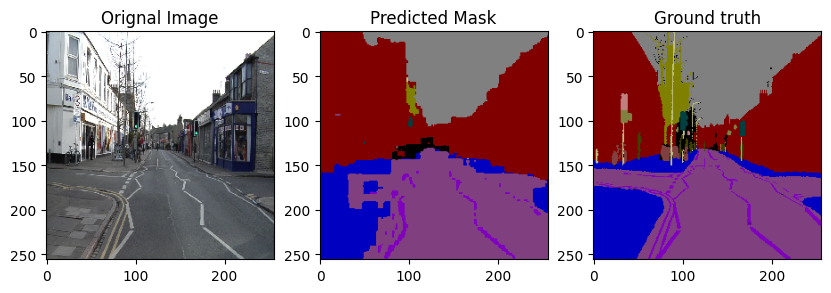

In [54]:
img = next(test_image_generator)[0]
gt_img = next(test_mask_generator)[0]
visualize_seg(img, gt_img, gt_mode='sparse')

In [60]:
def compute_metrics(y_true, y_pred):
  '''
  Computes IOU and Dice Score.

  Args:
    y_true (tensor) - ground truth label map
    y_pred (tensor) - predicted label map
  '''
  
  class_wise_iou = []
  class_wise_dice_score = []

  smoothening_factor = 0.00001

  for i in range(32):
    intersection = np.sum((y_pred == i) * (y_true == i))
    y_true_area = np.sum((y_true == i))
    y_pred_area = np.sum((y_pred == i))
    combined_area = y_true_area + y_pred_area
    
    iou = (intersection + smoothening_factor) / (combined_area - intersection + smoothening_factor)
    class_wise_iou.append(iou)
    
    dice_score =  2 * ((intersection + smoothening_factor) / (combined_area + smoothening_factor))
    class_wise_dice_score.append(dice_score)

    return class_wise_iou, class_wise_dice_score

In [59]:
p_img = model.predict(np.expand_dims(img, 0))[0]
pred_mask = np.argmax(p_img, axis=-1)
rgb_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(pred_mask, -1))



im_iou, im_dice = compute_metrics(np.uint8(gt_img),np.uint8(rgb_mask))

print('iou score, dice score',im_iou, im_dice  )

1/1 [==============================] - 0s 21ms/step
iou score, dice score [0.7750288149978518] [0.8732577279961601]


In [57]:
p_img.shape

(256, 256, 32)

In [ ]:
pred_mask.shape

## checking model after reconstructing

In [7]:
reconstructed_seg_model = tf.keras.models.load_model(
    "/kaggle/working/custom_seg_model.hdf5",
    custom_objects={"dice": dice, "IOU": IOU},
    compile= False
)

In [62]:
def visualize_seg(img, gt_mask, shape='normal', gt_mode='sparse'):
  fig , ax = plt.subplots(1,3,figsize=(10,10))
  
  # Img
  ax[0].imshow(img)
  ax[0].set_title("Orignal Image")
  
  # Predict
  pred_mask = reconstructed_seg_model.predict(np.expand_dims(img, 0))
  pred_mask = np.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[0]
  if shape=='flat':
    pred_mask = np.reshape(pred_mask, (256,256)) # Reshape only if you use the flat model. O.w. you dont need
  
  rgb_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(pred_mask, -1))
  
  # Prediction
  ax[1].imshow(rgb_mask)
  ax[1].set_title("Predicted Mask")

              
  # GT mask
  if gt_mode == 'ohe':
    gt_img_ohe = np.argmax(gt_mask, axis=-1)
    gt_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(gt_img_ohe, -1))              
  
  ax[2].imshow((gt_mask).astype(np.uint8))
  ax[2].set_title("Ground truth")

1/1 [==============================] - 1s 866ms/step


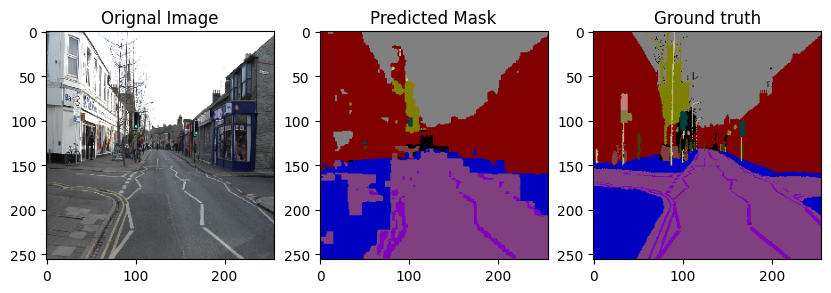

In [63]:
img = next(test_image_generator)[0]
gt_img = next(test_mask_generator)[0]
visualize_seg(img, gt_img, gt_mode='sparse')

In [64]:
p_img = reconstructed_seg_model.predict(np.expand_dims(img, 0))[0]
pred_mask = np.argmax(p_img, axis=-1)
rgb_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(pred_mask, -1))

im_iou, im_dice = compute_metrics(np.uint8(gt_img),np.uint8(rgb_mask))

print('iou score, dice score',im_iou, im_dice  )

1/1 [==============================] - 1s 577ms/step
iou score, dice score [0.7696508040831012] [0.8698335314138395]
